<a href="https://colab.research.google.com/github/SosaGabriel/DataScience/blob/main/Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bike Sharing**  
Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de obtención de membresía, alquiler y devolución de bicicletas se automatiza a través de una red de quioscos en toda la ciudad. Con estos sistemas, las personas pueden alquilar una bicicleta en un solo lugar y devolverla a un lugar diferente según sea necesario. Actualmente, hay más de 500 programas de bicicletas compartidas en todo el mundo.

<p align=center>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9ml4muLuDg-ZnxNgNIy72ecwomL9nb4TPRw&usqp=CAU" width="60%">
</p>


**Descripción de datos**  

Se le proporcionan datos de alquiler por horas que abarcan dos años. Para esta competencia, el conjunto de entrenamiento se compone de los primeros 19 días de cada mes, mientras que el conjunto de prueba es del 20 al final del mes. **Debe predecir el recuento total de bicicletas alquiladas durante cada hora** cubierta por el conjunto de prueba, utilizando solo la información disponible antes del período de alquiler.

El conjunto de datos y detalles del desafío en Kaggle [📝](https://www.kaggle.com/c/bike-sharing-demand/data)


In [1]:
#@title
# suprimir los warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import PolynomialFeatures

import calendar
from scipy import stats
from datetime import datetime

import math
import warnings
warnings.filterwarnings("ignore")


# permite visualizar todas las columnas
pd.options.display.max_columns = None
#estilo de los gráficos con Seaborn
sns.set_style('dark')

In [2]:
#desde un archivo local
from google.colab import files
uploaded = files.upload()


Saving sampleSubmission.csv to sampleSubmission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [4]:
!pwd


/content


In [6]:
%ls 

 sample_data/                sampleSubmission.csv   test.csv         train.csv
'sampleSubmission (1).csv'  'test (1).csv'         'train (1).csv'
'sampleSubmission (2).csv'  'test (2).csv'         'train (2).csv'
'sampleSubmission (3).csv'  'test (3).csv'         'train (3).csv'


In [7]:
#Importamos los datos a un dataframes
df_samplesub= pd.read_csv('/content/sampleSubmission.csv')
df_test= pd.read_csv('/content/test.csv')
df_train= pd.read_csv('/content/train.csv')

In [8]:
print("Los datos de entrenamiento contienen "+ str(df_train.shape[0])+" filas y "+str(df_train.shape[1])+" columnas \n")
print(df_train.columns)

print("Los datos de prueba contienen "+ str(df_test.shape[0])+" filas y "+str(df_test.shape[1])+" columnas \n")
print(df_test.columns)

Los datos de entrenamiento contienen 10886 filas y 12 columnas 

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Los datos de prueba contienen 6493 filas y 9 columnas 

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


*'casual', 'registered', 'count' no están en el set de test*

In [10]:
print("Entrenamiento: \t\nVarialbes: \t{}\nEntradas:\t{}".format(df_train.shape[1],df_train.shape[0]))

Entrenamiento: 	
Varialbes: 	12
Entradas:	10886


In [11]:
print("Prueba: \t\nVarialbes: \t{}\nEntradas:\t{}".format(df_test.shape[1],df_test.shape[0]))

Prueba: 	
Varialbes: 	9
Entradas:	6493


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [13]:
df_train.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [14]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df_train["season"].nunique()

4

In [15]:
print("Variables Numéricas:")
for i in df_train.select_dtypes(exclude = ['object']):
    print("\t\t"+i)

Variables Numéricas:
		season
		holiday
		workingday
		weather
		temp
		atemp
		humidity
		windspeed
		casual
		registered
		count


In [17]:
# Tipos de Variables 
print("Variables con Texto:")
for i in df_train.select_dtypes(include = ['object']):
    print("\t\t"+i)

Variables con Texto:
		datetime


In [18]:

print("Variables con Nulos")
missing_val_count = (df_train.isnull().sum())
print(missing_val_count[missing_val_count > 0])

Variables con Nulos
Series([], dtype: int64)


In [19]:
df_train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [21]:
df_train["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [22]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'],format='%Y-%m-%d %H:%M:%S')

#add new columns from the datetime column
df_train['month'] = df_train['datetime'].dt.month 
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour 
df_train['dayofweek'] =df_train['datetime'].dt.dayofweek 

df_train = df_train.drop(["datetime"],axis=1)

In [23]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,5


In [25]:
df_train.shape

(10886, 15)

In [24]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,9.992559,11.541613,3.013963
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,5.476608,6.915838,2.004585
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,5.000000,6.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,10.000000,12.000000,3.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,15.000000,18.000000,5.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,19.000000,23.000000,6.000000


* Sin valores nulos o faltantes
* Tenemos discrepancias(outliers) en Casual, registered, count?
Atención a la diferencia entre el q3 y q4

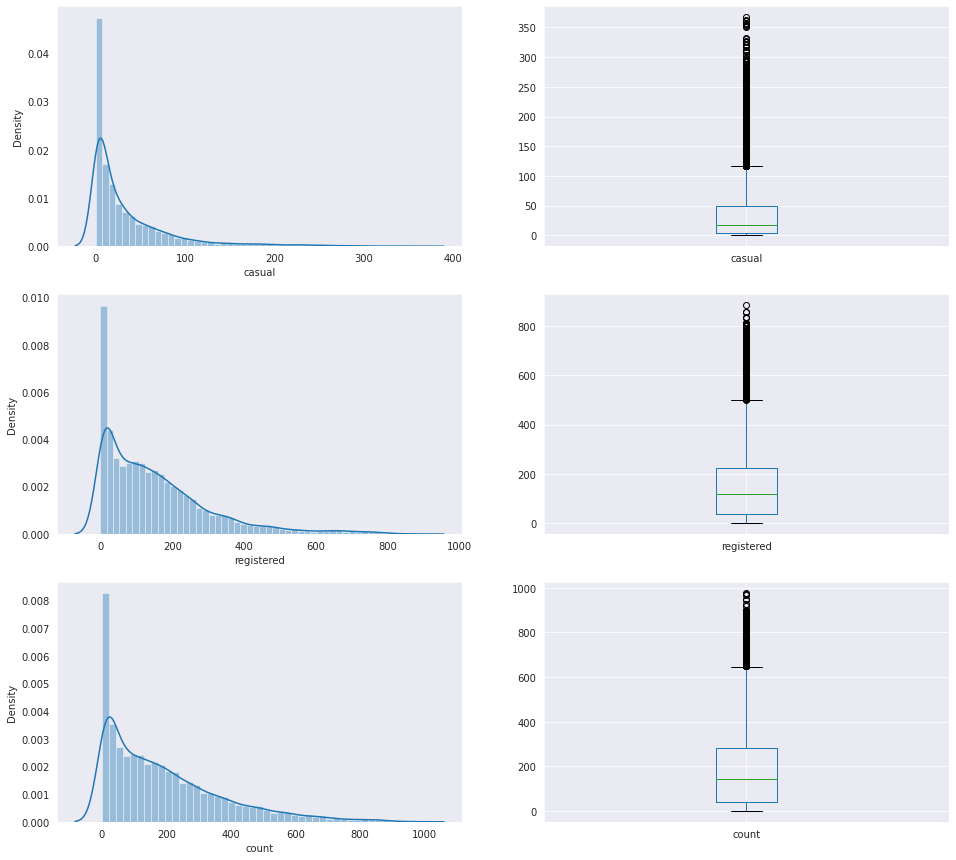

In [22]:
fig, ax = plt.subplots(3,2, figsize=(16,15))

#Usuarios
sns.distplot(df_train["casual"],ax=ax[0][0])
df_train.boxplot("casual", ax=ax[0][1])

sns.distplot(df_train["registered"], ax=ax[1][0])
df_train.boxplot("registered", ax=ax[1][1])

#counts
sns.distplot(df_train["count"], ax=ax[2][0])
df_train.boxplot("count", ax=ax[2][1])

fig.show()

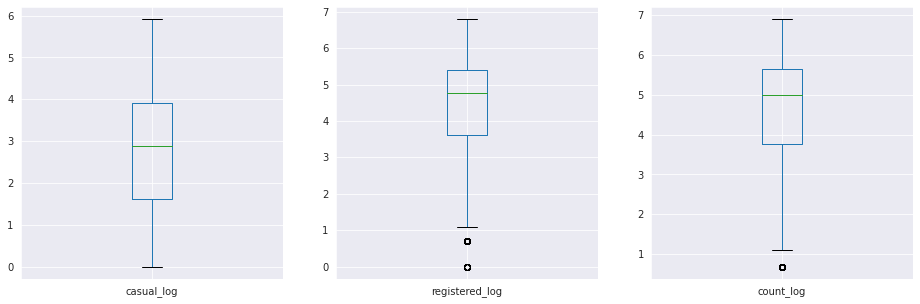

In [34]:
#normalización de las columnas(casual, registered y count)
df_train['casual_log'] = np.log((1+ df_train['casual']))
df_train['registered_log'] = np.log((1+ df_train['registered']))
df_train['count_log'] = np.log((1+ df_train['count']))

#Resultado de la redistribución
fig, ax = plt.subplots(1,3, figsize=(16,5))
df_train.boxplot("casual_log", ax=ax[0])
df_train.boxplot("registered_log", ax=ax[1])
df_train.boxplot("count_log", ax=ax[2])

fig.show()

In [27]:
df_train['casual_log'].describe()

count    10886.000000
mean         2.712439
std          1.491055
min          0.000000
25%          1.609438
50%          2.890372
75%          3.912023
max          5.908083
Name: casual_log, dtype: float64

In [35]:
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek,casual_log,registered_log,count_log
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,6.521495,9.992559,11.541613,3.013963,2.712439,4.395774,4.591364
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,3.444373,5.476608,6.915838,2.004585,1.491055,1.399383,1.419454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.693147
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,4.000000,5.000000,6.000000,1.000000,1.609438,3.610918,3.761200
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,7.000000,10.000000,12.000000,3.000000,2.890372,4.779123,4.983607
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,10.000000,15.000000,18.000000,5.000000,3.912023,5.407172,5.652489
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,12.000000,19.000000,23.000000,6.000000,5.908083,6.787845,6.885510


In [36]:
print("Entrenamiento: \t\nVarialbes: \t{}\nEntradas:\t{}".format(df_train.shape[1],df_train.shape[0]))

Entrenamiento: 	
Varialbes: 	18
Entradas:	10886


Veamos la matriz de correlación para obtener una descripción general de cómo están conectadas las variables

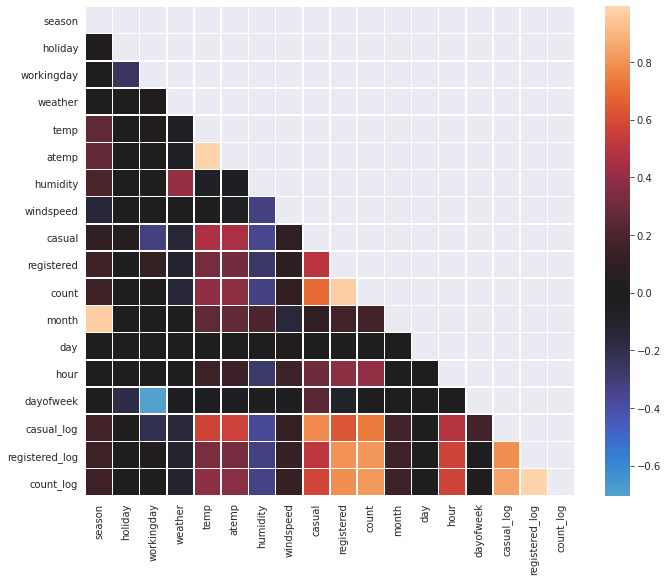

In [29]:
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5)

Observamos que hay una ligera correlación entre algunos valores, pero **la correlación para cada característica es demasiado pequeña para que la predicción dependa de un valor**, por lo que se necesita un modelo de aprendizaje automático

In [26]:
def plot_category_with_user_type(category):
 
     #set plot up
    fig, ax = plt.subplots(1,3, figsize=(16,5), sharey=True)
    #title
    fig.suptitle("Relación con " + category, fontsize=14)
    #plot 3 plots for count,casual and registered customers 
    sns.barplot(x = category, y = "count", data = df_train, ax = ax[0])
    sns.barplot(x = category, y = "casual", data = df_train, ax = ax[1])
    sns.barplot(x = category, y = "registered",  data = df_train, ax = ax[2])
    fig.show()

https://seaborn.pydata.org/generated/seaborn.barplot.html

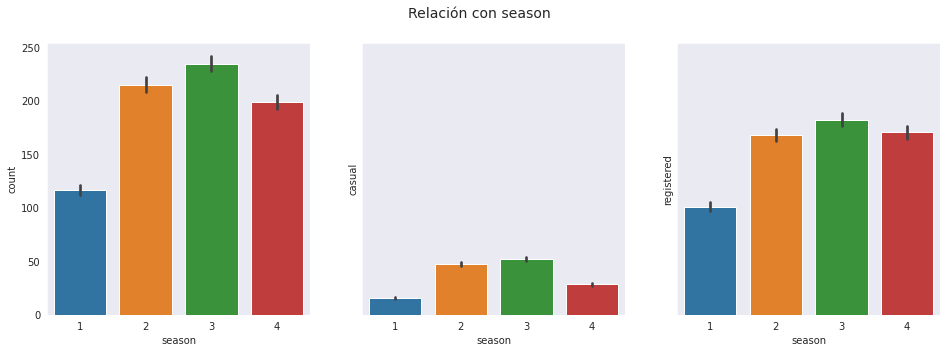

In [27]:
plot_category_with_user_type("season")

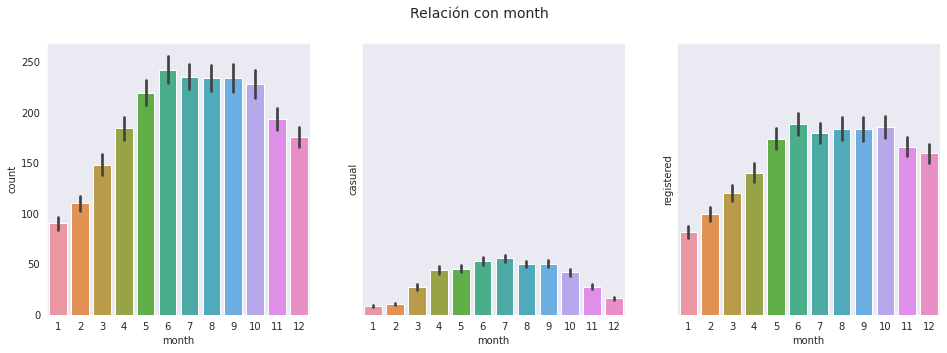

In [28]:
plot_category_with_user_type("month")

Nota para el hemisferio Norte: los usuarios (registrados y ocasionales) muestran un patrón a través de las estaciones, las reservas son más bajas en la primavera (temporada 1), alcanzan su punto máximo en verano y otoño (temporada 2 + 3) y caen un poco en invierno (temporada 4).
Los resultados coincidentes se muestran en la distribución de meses.


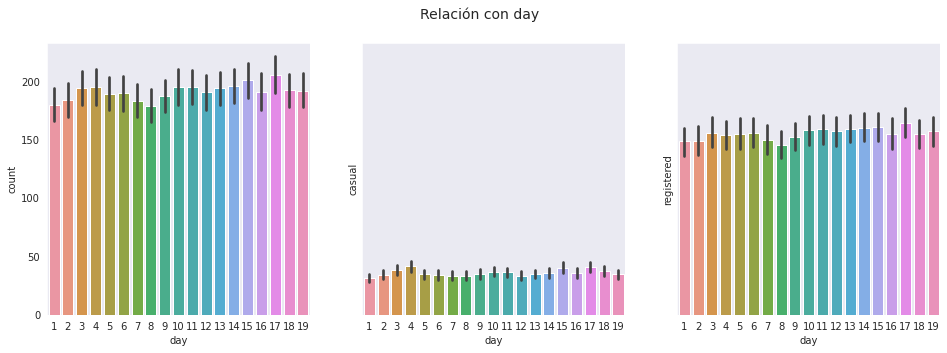

In [29]:
plot_category_with_user_type("day")
#disribución constante en todo el mes

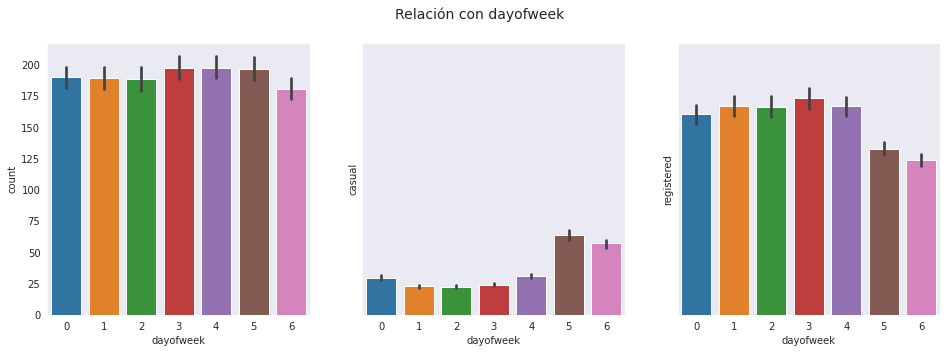

In [30]:
plot_category_with_user_type("dayofweek")

* El número de reservas es constante en general a lo largo de la semana,pero hay una ligera caída el domingo.

* Hay un patrón entre los usuarios casuales que no se registran, hay un pico de uso los sábados y domingos.
Existe un patrón entre los usuarios registrados: las reservas son constantes durante toda la semana, excepto los sábados y domingos, que pueden ser el resultado de múltiples razones.

* No hay suficientes bicicletas debido a la mayor demanda por parte de usuarios no registrados cerca de los fines de semana, lo que significa que se deben introducir más bicicletas en el sistema.


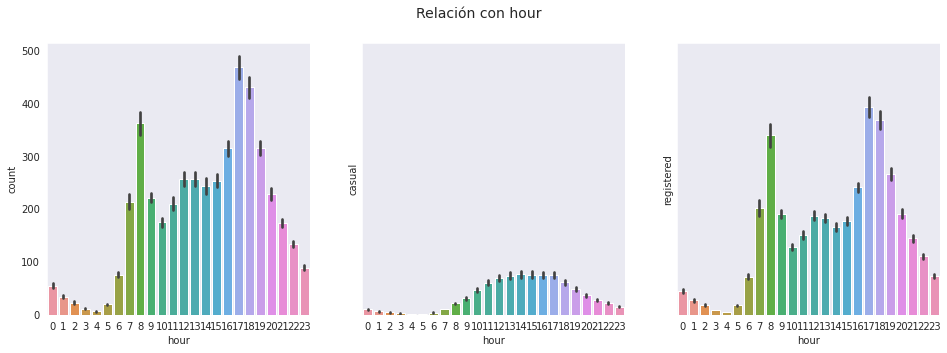

In [31]:
plot_category_with_user_type("hour")

Los usuarios ocasionales suelen utilizar la bicicleta de 12 a 6 p.m.
las reservas de usuarios registrados tienen un pico a las 8 a. m. y de 5 a 6 pm.

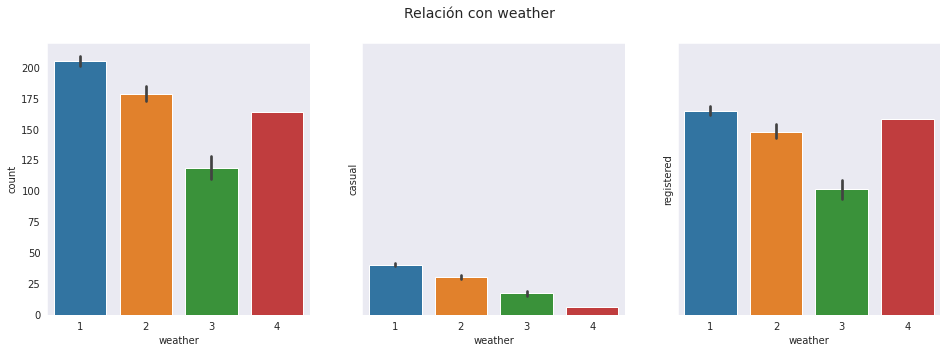

In [32]:
plot_category_with_user_type("weather")

* Los usuarios ocasionales tienden a reservar más cuando hace mejor tiempo
* Usuarios registrados reservan constantemente, excepto cuando el clima está con "Nieve ligera, lluvia ligera ..." (número 3)

la diferencia de patrones refuerza la teoría de los diferentes propósitos entre usuarios registrados y ocasionales

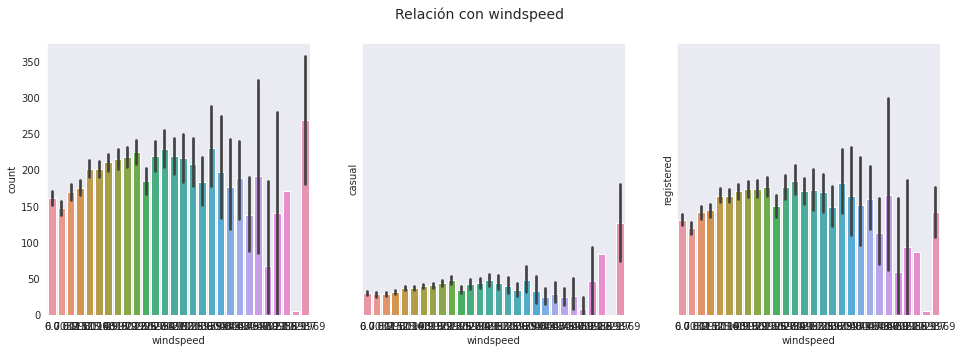

In [33]:
plot_category_with_user_type("windspeed")

* La distribución es casi constante independientemente de la velocidad del viento, excepto por un par de valores atípicos.
Debe excluirse la velocidad del viento.

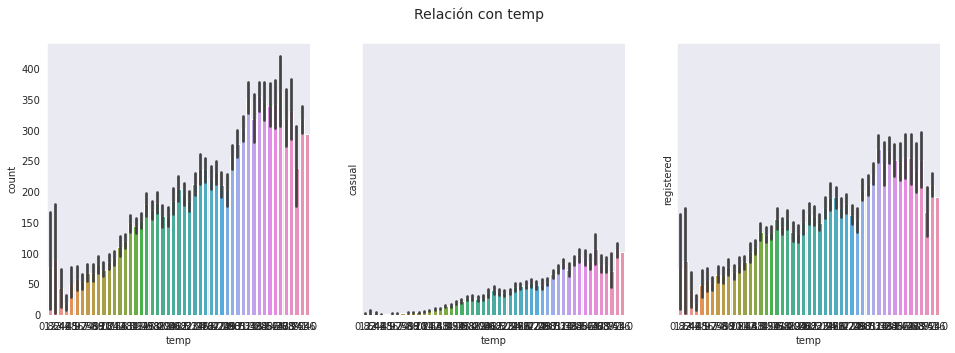

In [34]:
plot_category_with_user_type("temp")

* A mejor temperatura + Reservas

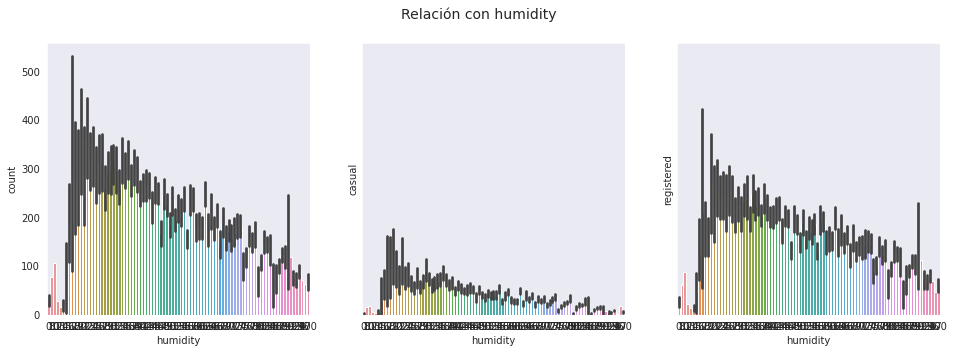

In [35]:
plot_category_with_user_type("humidity")

La gente tiende a alquilar bicicletas cuando la humedad es más baja de lo habitual, pero el cambio no es tan drástico y la variación es grande

### Distribución de ReservasxHoras x Dia

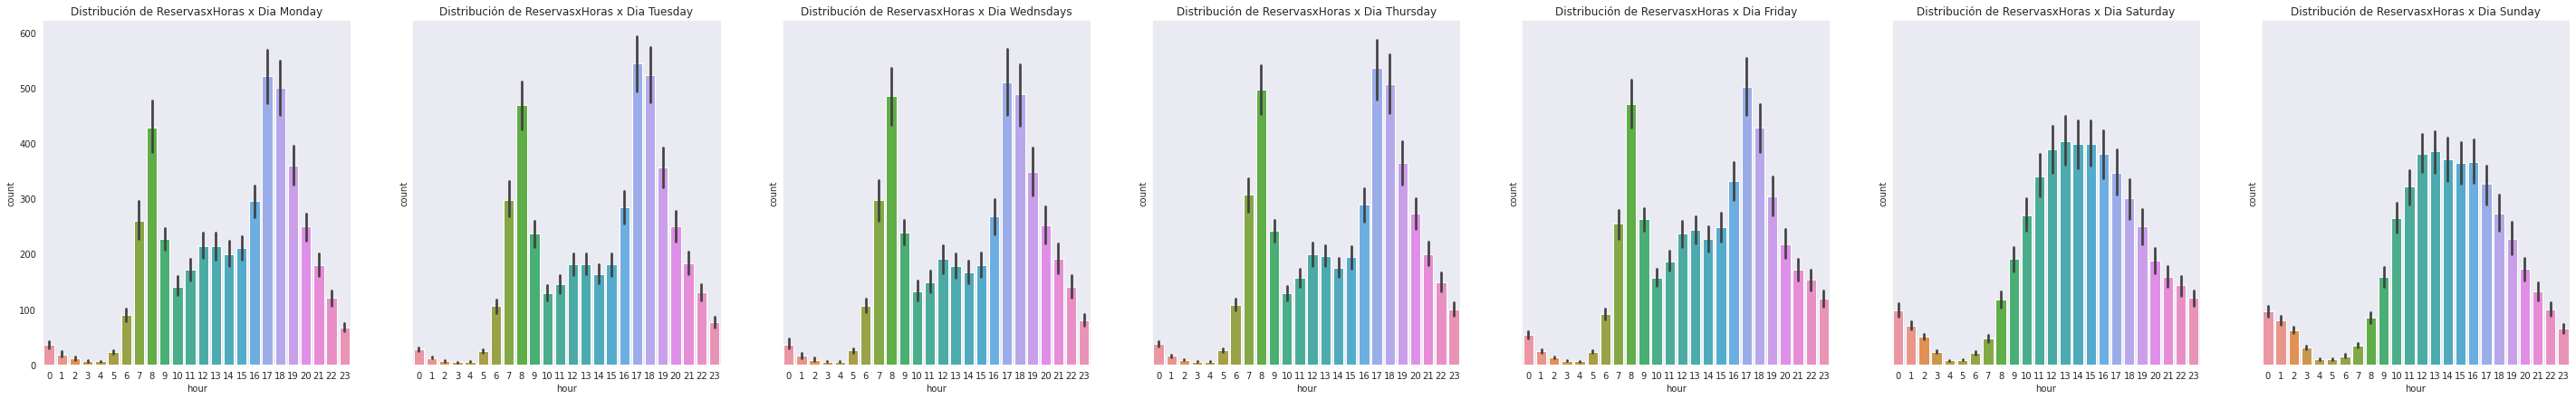

In [30]:
fig, ax = plt.subplots(1,7, figsize=(50,7), sharey=True)

days=["Monday", "Tuesday", "Wednsdays", "Thursday", "Friday","Saturday", "Sunday"]

for i in range(7): 
    #dividir los datos según el día de la semana
    day_data= df_train[df_train["dayofweek"] == i]
    #Graf la distribución por día
    sns.barplot(x = "hour", y = "count", data = day_data, ax = ax[i]).set_title("Distribución de ReservasxHoras x Dia " + days[i])
fig.show()

Echemos un vistazo a "atemp" y respondamos estas preguntas
¿Es atemp siempre > que la temperatura real?
¿Existe una conexión entre la temperatura y la humedad? si la respuesta a la primera pregunta es sí, ¿puede ser la razón la humedad?
¿Deberíamos usarlo en los modelos?

### Calcular la diferencia entre temp y atemp

In [31]:

dif_atemp_temp = df_train["atemp"] - df_train["temp"]
#binarizamos el resultado
dif_atemp_temp[dif_atemp_temp >= 0] = 1
dif_atemp_temp[dif_atemp_temp < 0] = 0
#%
sum(dif_atemp_temp) / len(dif_atemp_temp)

0.9908138893992283

El 99% de las veces atemp>temp

## Que correlación hay entre atemp,temp y humidity?

In [32]:
#calculate the correlation between temp, atemp and humidity
correlacion = df_train[["temp", "atemp", "humidity"]].corr()
correlacion

,temp,atemp,humidity
temp,1.000000,0.984948,-0.064949
atemp,0.984948,1.000000,-0.043536
humidity,-0.064949,-0.043536,1.000000


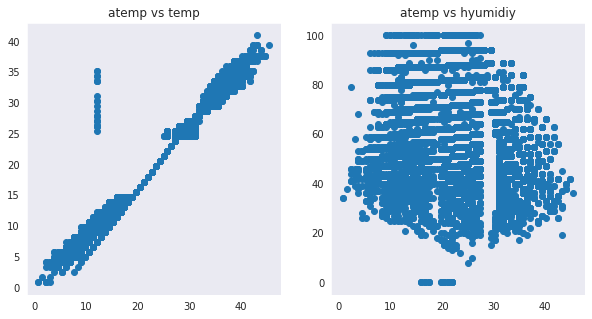

In [39]:
fig = plt.figure(figsize=(10,5))
plt1 = fig.add_subplot(121)
plt2 = fig.add_subplot(122)

#naming plots
plt1.set_title('atemp vs temp')
plt2.set_title('atemp vs hyumidiy')
#ploting plots
plt1.scatter(df_train["atemp"], df_train["temp"])
plt2.scatter(df_train["atemp"], df_train["humidity"])


Al observar los valores de correlación y el gráfico de dispersión, atemp y temp están claramente correlacionadas, mientras que la temperatura y la humedad no se correlacionan en absoluto.

Eliminaremos a atemp ya que está altamente correlacionada com temp

In [33]:
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek,casual_log,registered_log,count_log
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,1,0,5,1.386294,2.639057,2.833213
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5,2.197225,3.496508,3.713572
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,1,2,5,1.791759,3.332205,3.496508
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,1,3,5,1.386294,2.397895,2.639057
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,1,4,5,0.000000,0.693147,0.693147


In [38]:
df_train = df_train.drop(["atemp"],axis=1)

KeyError: ignored

In [41]:
print("Entrenamiento: \t\nVarialbes: \t{}\nEntradas:\t{}".format(df_train.shape[1],df_train.shape[0]))

Entrenamiento: 	
Varialbes: 	17
Entradas:	10886


In [40]:
correlation = df_train[["season","temp", "weather", "windspeed", "humidity"]].corr()
correlation

,season,temp,weather,windspeed,humidity
season,1.000000,0.258689,0.008879,-0.147121,0.190610
temp,0.258689,1.000000,-0.055035,-0.017852,-0.064949
weather,0.008879,-0.055035,1.000000,0.007261,0.406244
windspeed,-0.147121,-0.017852,0.007261,1.000000,-0.318607
humidity,0.190610,-0.064949,0.406244,-0.318607,1.000000


**La distribución de las reservas en festivos, ¿es similar a los días normales?**

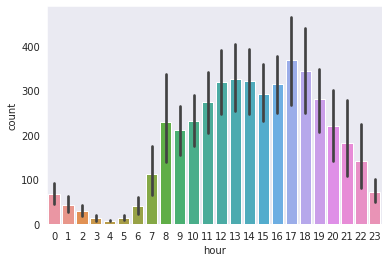

In [43]:
holiday_data = df_train[(df_train["holiday"]==1) & (df_train["dayofweek"]<5)]
sns.barplot(x = "hour", y = "count", data = holiday_data)


La distribución de reservas en festivos es muy similar a los fines de semana, y el atributo bolean de día laborable está teniendo en cuenta esta variable (es 1 cuando el día no es festivo o fin de semana).

No es necesario el atributo de vacaciones


Anteriormente hemos visto que la distribución de las reservas es constante a lo largo del mes independientemente del número de días, lo que nos lleva a creer que:

no es necesario el atributo de día


También hemos visto que la distribución entre las semanas es consistente y es aproximadamente la misma para todos los días excepto los fines de semana. que se considera en el atributo jornada laboral, nos lleva a creer que:

No es necesario el atributo day of week


### Los atributos de clima y estación son categóricos,convertirlos en a valores binarios (dummies)

In [45]:
 df_train2 =  df_train.join(pd.get_dummies( df_train["season"], prefix="season")).join(pd.get_dummies( df_train["weather"], prefix="weather"))
 df_train2.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,count,month,day,hour,dayofweek,casual_log,registered_log,count_log,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,1,0,0,1,9.84,81,0.0,3,13,16,1,1,0,5,1.386294,2.639057,2.833213,1,0,0,0,1,0,0,0
1,1,0,0,1,9.02,80,0.0,8,32,40,1,1,1,5,2.197225,3.496508,3.713572,1,0,0,0,1,0,0,0
2,1,0,0,1,9.02,80,0.0,5,27,32,1,1,2,5,1.791759,3.332205,3.496508,1,0,0,0,1,0,0,0
3,1,0,0,1,9.84,75,0.0,3,10,13,1,1,3,5,1.386294,2.397895,2.639057,1,0,0,0,1,0,0,0
4,1,0,0,1,9.84,75,0.0,0,1,1,1,1,4,5,0.000000,0.693147,0.693147,1,0,0,0,1,0,0,0


In [46]:
print("Entrenamiento: \t\nVarialbes: \t{}\nEntradas:\t{}".format(df_train2.shape[1],df_train.shape[0]))

Entrenamiento: 	
Varialbes: 	25
Entradas:	10886


In [47]:
df_train2 = df_train2.drop(["count", "registered","casual","holiday","dayofweek","month","season","weather","windspeed"],axis=1)


In [48]:
print("Entrenamiento: \t\nVarialbes: \t{}\nEntradas:\t{}".format(df_train2.shape[1],df_train.shape[0]))

Entrenamiento: 	
Varialbes: 	16
Entradas:	10886


In [49]:
df_train2.head()

,workingday,temp,humidity,day,hour,casual_log,registered_log,count_log,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,9.84,81,1,0,1.386294,2.639057,2.833213,1,0,0,0,1,0,0,0
1,0,9.02,80,1,1,2.197225,3.496508,3.713572,1,0,0,0,1,0,0,0
2,0,9.02,80,1,2,1.791759,3.332205,3.496508,1,0,0,0,1,0,0,0
3,0,9.84,75,1,3,1.386294,2.397895,2.639057,1,0,0,0,1,0,0,0
4,0,9.84,75,1,4,0.000000,0.693147,0.693147,1,0,0,0,1,0,0,0


In [58]:
def part_data(full_data):
  #split data by day
    train_data = full_data[df_train["day"]<15]
    test_data = full_data[df_train["day"]>14]

    #dropping the day column
    train_data = train_data.drop(["day"],axis=1)
    test_data = test_data.drop(["day"],axis=1)

    #splitting the training data into x and y axises
    x_train = train_data.drop(["casual_log", "count_log", "registered_log"],axis=1)
    y_train = train_data[["count_log"]]

    #splitting the test data into x and y axises
    x_test = test_data.drop(["casual_log", "count_log", "registered_log"],axis=1)
    y_test = test_data[["count_log"]]
    
    return x_train, y_train, x_test, y_test

In [62]:
def crear_modelo(df_train, model, plot = False, tuning_parameter = 1, result= False):
    #split data using the previous function
    x_train, y_train, x_test, y_test = part_data(df_train)

    #models dictionary
    models={
        "linear" : LinearRegression(),
        "ridge" : Ridge(alpha = tuning_parameter),
        "knn" : KNeighborsRegressor(n_neighbors = tuning_parameter),
        "decision_tree" : DecisionTreeRegressor(random_state=42)
    }


    #initiate model
    lModel = models[model]
    #fit the training data in the model
    lModel.fit(X = x_train, y = y_train)
    
    #predict new values
    y_predicted=lModel.predict(X= x_test) 

    #calculate MSE
    MSE = mean_squared_error(y_test, y_predicted)
    
    #plot real vs predicted values if the plot boolean is true
    if (plot):
        plt.figure(figsize=(5, 5))
        plt.scatter(y_test, y_predicted)
        plt.ylabel("predicted values")
        plt.xlabel("real values")
        #find min and max in the test target values
        minimum = math.ceil(y_test.min())
        maximum = math.ceil(y_test.max())
        #plot a diagonal line accross the scattered plot to better see the difference in values
        #idealy all points should be on the diagonal line
        plt.plot( [minimum,maximum],[minimum,maximum], color='red')
    if (result): return lModel, MSE, y_predicted
    return lModel, MSE

In [60]:
def undo_log_transform(df_train): 
    return (np.floor(np.exp(df_train) -1))

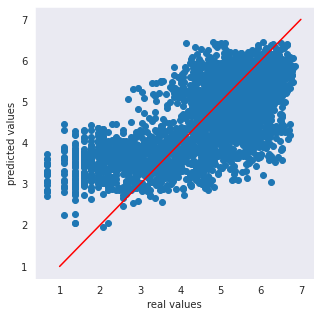

In [63]:
#build a linear model and plot the result
model, MSE, linear_result = crear_modelo(df_train2, "linear", plot = True, result = True)

In [64]:
#vlaues predicted from model
undo_log_transform(linear_result)

array([[ 13.],
       [ 16.],
       [ 17.],
       ...,
       [236.],
       [260.],
       [253.]])

### **Linear Regression-polynomial features**
características polinomiales para mejorar el modelo


In [66]:
#set up the polynomial fearues object
polynomial_fearues = PolynomialFeatures(degree=4, interaction_only=True)

polynomial_fearures_data = df_train2[["workingday", "hour", "temp", "humidity"]]

#make polynomial features out of the data
polynomial_fearues = polynomial_fearues.fit_transform(polynomial_fearures_data)
#turn the result into a dataframe
intr_features = pd.DataFrame(polynomial_fearues)

In [69]:
list_of_MSEs = []
list_of_thetas = []

#for each column in the polynomial fearues dataset: append it to the data and test the model
for (columnName, columnData) in intr_features.iteritems():
    polynomial_hypothesis_data = df_train2.drop(["workingday", "hour", "temp", "humidity"],axis=1)
    #appending the column
    polynomial_hypothesis_data["polynomial_factor"] = columnData
    
    #build model and assess it
    model, MSE = crear_modelo(polynomial_hypothesis_data, "linear")
    
    list_of_MSEs.append(MSE)
    list_of_thetas.append(model.coef_)
    
list_of_MSEs

[1.8770857444412652,
 1.8777416981218686,
 1.224738701548065,
 1.6230744477390837,
 1.6645035366448349,
 1.6104269271701983,
 1.8559347852469816,
 1.8536754621650737,
 1.1547874093987074,
 1.5046535075150507,
 1.8795640158755127,
 1.5794410954221116,
 1.6861600240620729,
 1.8718088863195979,
 1.4148024539900923,
 1.6564947090743378]

Los valores de las MSE son mayores cuando se utilizan entidades polinomiales que cuando se utiliza la regresión lineal simple, por lo que los ignoraremos.